# EDA

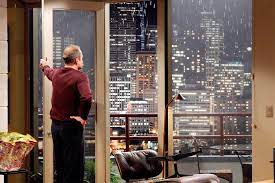

### I chose *Erin Robinson*! <br>
Miss Robinson is a buyer with a vision to improve the conditions of the socioeconomic disadvantaged in Kings County. <br>
Her aim is to:<br>
* <span style="color:black"> buy in a poorer district 
* <span style="color:black"> probably want to renovate
* <span style="color:black"> re-sell with a minimal profit!


Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br><span style="color:grey"> *(Because: Miss Robinson aims to renovate houses to improve the living conditions of the people in that district. <br> 
If a house in very bad conditions it is cheaper to be wrecked and rebuilt. <br>
A newly built house is to expensive for the people Miss Robinson is doing her buisness for and would either end up in loss for Miss Robinson <br>
**or** with the inlfux of socioeconomic more advantaged people displacing the more disadvantaged ones!)*
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

## Noah Widdershooven	Ernie Robinson	<b>
1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>
2. The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>
3. Renovating a house increases its worth, independent of the region it is located in.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
import psycopg2
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv() # aufrufen der .env datei

DB_STRING = os.getenv('DB_STRING') #abfragen der .env informationen 
stri_db = create_engine(DB_STRING) # Aufbau einer verbindung zur DB

# Hier Fetche ich die ge-jointe Tabelle 
query_string = "SET SCHEMA 'eda'; SELECT * FROM eda.king_county_house_details d LEFT JOIN king_county_house_sales s ON d.id = s.house_id;" # SQL befehl zum joinen der Tabellen
db_request = pd.read_sql(query_string, stri_db) # Die Daten Fetchen 
#db_request.to_csv('eda_project_MergedData.csv',index=False) # Speichern der gefetchten und ge-jointen Tabelle

In [3]:
db_request.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [4]:
db_request.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [5]:
#droping unnecessary or doubled columns
db_request.drop('id', axis=1, inplace=True)

In [6]:
db_request.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id'],
      dtype='object')

In [7]:
# checking colimns because I can
db2 = db_request.copy()
Col_List = db2.columns.tolist()
Col_List


['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date',
 'price',
 'house_id']

In [8]:
# headers are ok


<Axes: >

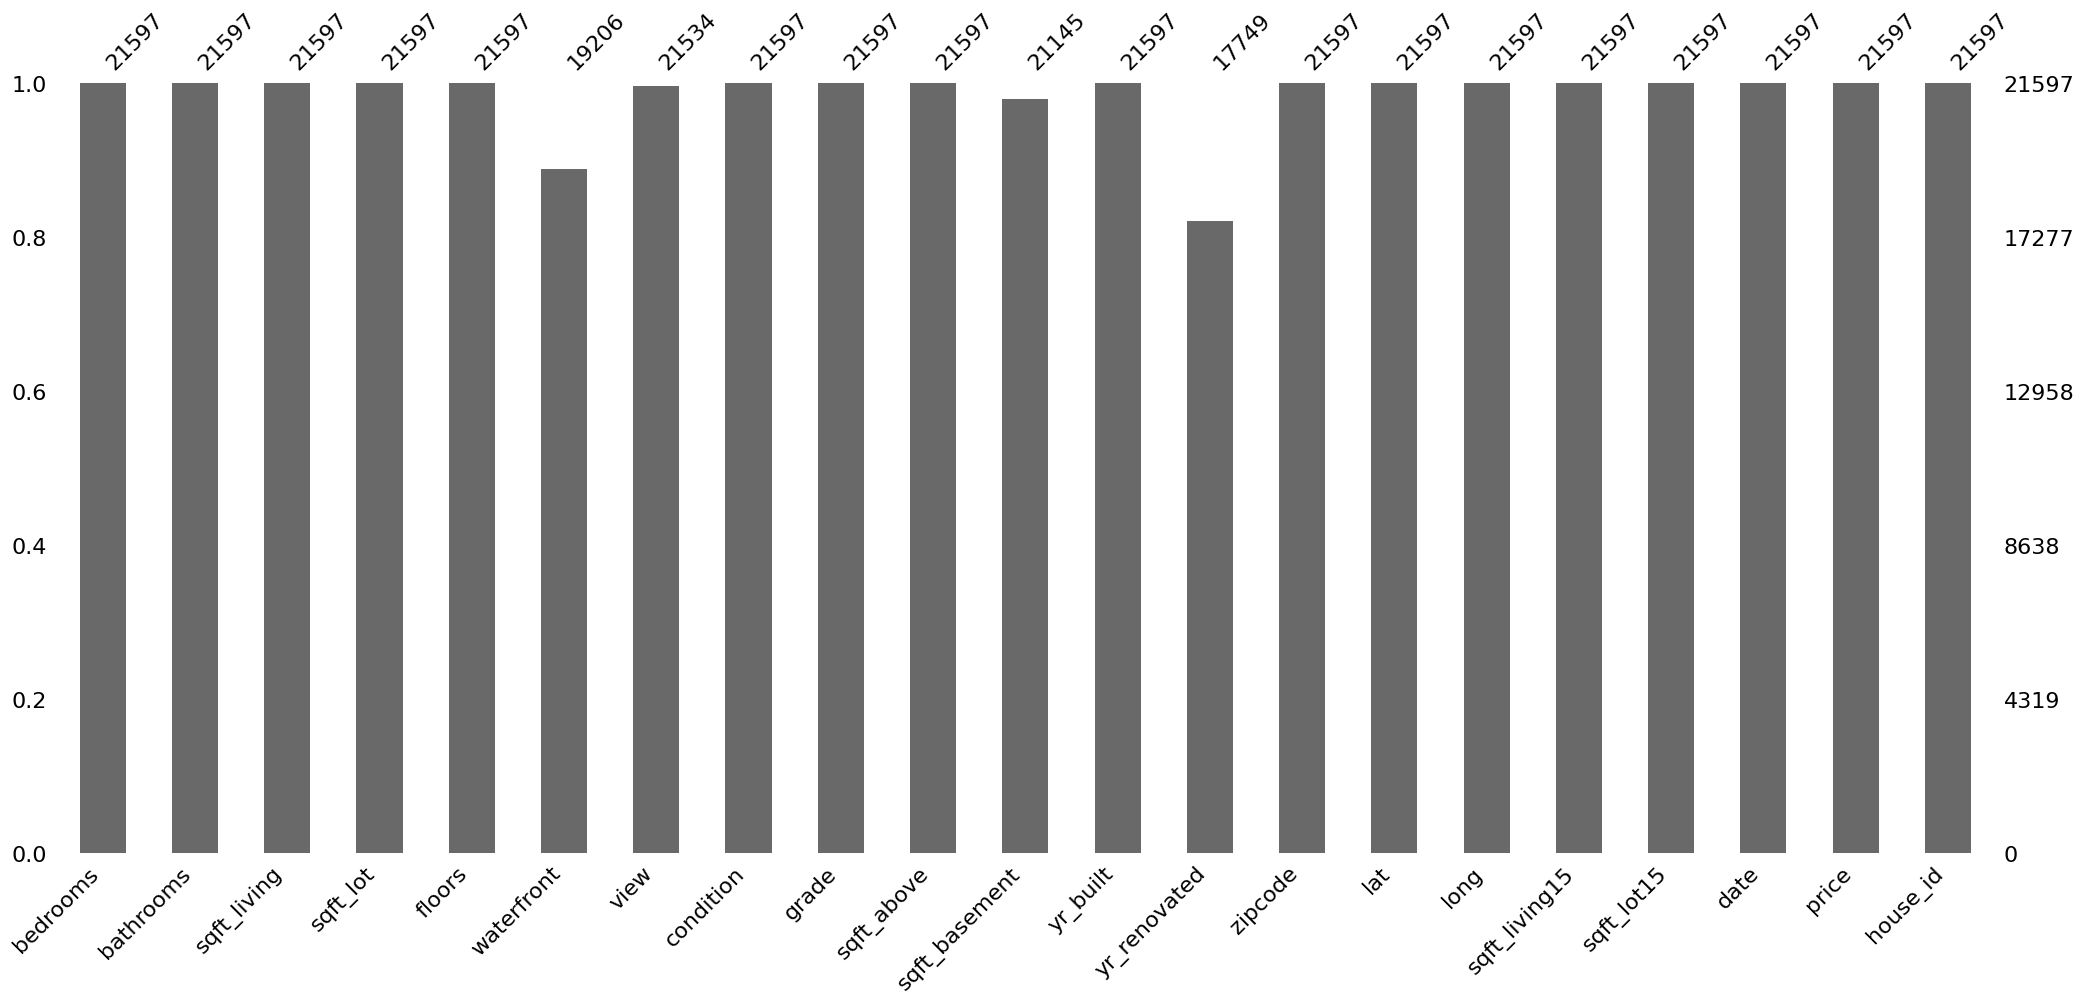

In [9]:
msno.bar(db_request)

In [10]:
# check how many duplicated rows exist in the data set - in particular for the 
# house_ids as one house might be sold multiple times

db_request[['house_id', 'price']].duplicated().value_counts()

grouped_df = db_request.groupby(['house_id', 'price'])['date'].count().reset_index(name='anzahl_verkäufe')
doppelte_verkäufe = grouped_df[grouped_df['anzahl_verkäufe'] > 1]
doppelte_verkäufe
# no real duplicates as the duplicated house_ids do not have the same date of sale or price, 
# which means: they just have ben sold multiple times


,house_id,price,anzahl_verkäufe
4580,1825069031,550000.000,2
14389,6308000010,585000.000,2
18940,8648900110,555000.000,2


In [11]:
# checing for data types
db_request.dtypes

bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
dtype: object

In [12]:
# change date to timestamp
db_request['date'] = pd.to_datetime(db_request['date'], format='%Y/%m/%d')
type(db_request['date'][0])
db_request['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [13]:
# bedrooms zu int
db_request = db_request.astype({'bedrooms': int})

In [14]:
# view grade zu int
#db_request = db_request.astype({'view': int})

In [15]:
# fill na in view
view_imput = int(db_request['view'].mean())

In [16]:
db_request.fillna({'view': view_imput}, inplace=True)

In [17]:
db_request['view'].isna().sum()

np.int64(0)

In [18]:
db_request = db_request.astype({'view': int})

In [19]:
# prices integer
db_request = db_request.astype({'price': int})

In [20]:
# waterfront 1 zu true und 0 zu false
db_request['waterfront'].fillna(0, inplace=True)
db_request['waterfront'] = db_request['waterfront'].map({1: True, 0: False})
db_request['waterfront'].head()


0    False
1    False
2    False
3    False
4    False
Name: waterfront, dtype: bool

In [21]:
# yr_renovated und zipcode comma verschieben und zu integer
db_request['yr_renovated'].head()

0       0.000
1   19910.000
2         NaN
3       0.000
4       0.000
Name: yr_renovated, dtype: float64

In [22]:
db_request['yr_renovated'].isna().sum()

np.int64(3848)

In [23]:
# dealing with na in renovation year
db_request["yr_renovated"] = (db_request["yr_renovated"]) / 10.0
db_request.loc[(db_request.yr_renovated == 0), 'yr_renovated'] = np.nan
db_request['yr_renovated'] = db_request['yr_renovated'].astype(pd.Int64Dtype())

In [24]:
# adding bolean for renovation, have they ever been renovated? True False?
db_request.eval('renovated = yr_renovated', inplace = True)
db_request['renovated'].fillna(0, inplace=True)
db_request['renovated'] = db_request['yr_renovated'].ne(0)
db_request['renovated'].fillna(False, inplace=True)

db_request['renovated'].dtype

BooleanDtype

In [25]:
db_request.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,renovated
0,3,1.000,1180.000,5650.000,1.000,False,0,3,7,1180.000,...,<NA>,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900,7129300520,False
1,3,2.250,2570.000,7242.000,2.000,False,0,3,7,2170.000,...,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000,6414100192,True
2,2,1.000,770.000,10000.000,1.000,False,0,3,6,770.000,...,<NA>,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000,5631500400,False
3,4,3.000,1960.000,5000.000,1.000,False,0,5,7,1050.000,...,<NA>,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000,2487200875,False
4,3,2.000,1680.000,8080.000,1.000,False,0,3,8,1680.000,...,<NA>,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000,1954400510,False


In [26]:
db_request['yr_renovated'].unique()

<IntegerArray>
[<NA>, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954, 2014,
 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000, 1999, 1998, 1970, 1989,
 2004, 1986, 2007, 1987, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
 1948, 2009, 2015, 1974, 2008, 1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996,
 1955, 1982, 1956, 1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967,
 1965, 1934, 1972, 1944, 1958]
Length: 70, dtype: Int64

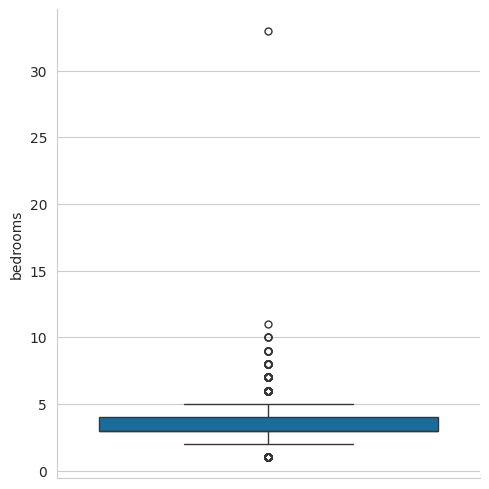

In [27]:
# boxplots und scatterplotts für ausreißer

sns.set_style("whitegrid")

sns.catplot(
    data=db_request,y='bedrooms',
    kind='box', 
    palette="colorblind")

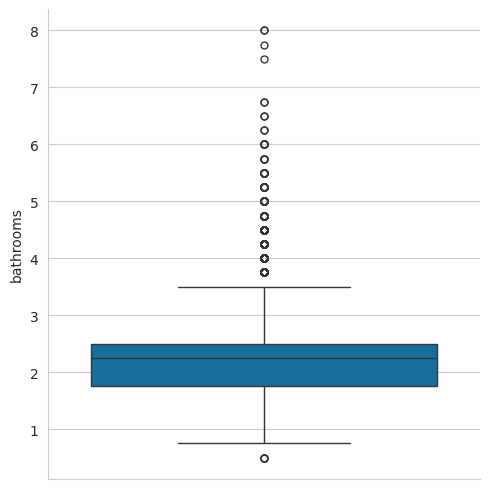

In [28]:
sns.catplot(
    data=db_request,y='bathrooms',
    kind='box', 
    palette="colorblind")

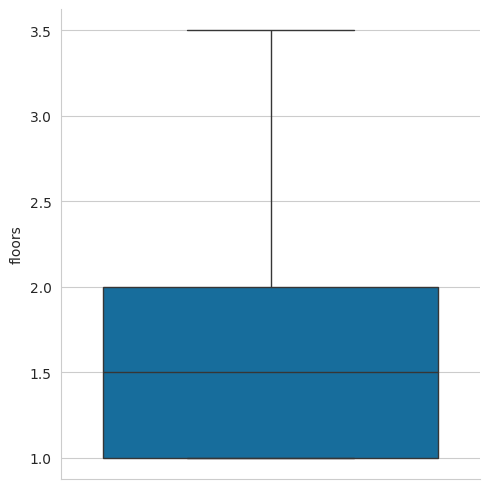

In [29]:
sns.catplot(
    data=db_request,y='floors',
    kind='box', 
    palette="colorblind")

<Axes: xlabel='bedrooms', ylabel='price'>

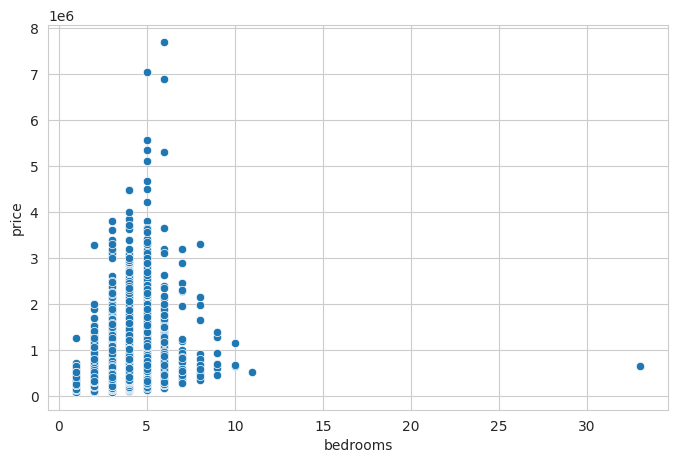

In [30]:
sns.scatterplot(data=db_request, x='bedrooms', y='price')

In [31]:
#droping this weid house
db2
db2[db2['bedrooms'] > 30]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
15856,33.000,1.750,1620.000,6000.000,1.000,0.000,0.000,5,7,1040.000,...,1947,0.000,98103,47.688,-122.331,1330.000,4700.000,2014-06-25,640000.000,2402100895


In [32]:
import plotly.express as px

fig = px.scatter_mapbox(db_request,
                           lat=db_request.lat,
                           lon=db_request.long,
                           color='condition',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )
fig.show()


1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>

In [33]:
db_request.zipcode.nunique()

70

In [34]:

db_request[db_request['price'] < db_request.price.mean()]['zipcode'].nunique()
db_request.price.mean()


np.float64(540296.5735055795)

In [35]:
grp_zip = db_request.groupby('zipcode')
grp_zip_mean = db_request.groupby('zipcode').mean('price').reset_index()
poorer_zip = grp_zip_mean[grp_zip_mean['price'] < 540296.0]


In [38]:

fig_belowAvgPrice_map = px.choropleth_mapbox(poorer_zip,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Neighborhoods with average house prices below the total house-price average in Kings County',
                           mapbox_style='open-street-map', zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": poorer_zip['lat'].mean(), "lon": poorer_zip['long'].mean()}
                     )


figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_belowAvgPrice_map.show(), figCondition.show(), figPrice.show()

(None, None, None)

In [ ]:
prices_q1 = db_request.price.quantile(0.25)
grp_zip_q1 = grp_zip_mean[grp_zip_mean['price'] < prices_q1]

In [ ]:

fig_q1 = px.choropleth_mapbox(grp_zip_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1 neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_q1['lat'].mean(), "lon": grp_zip_q1['long'].mean()}
                     )

figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_q1.show(), figCondition.show(), figPrice.show()

In [ ]:
# zipcodes are ok but if the sqfeet are simply less the prices qill stay lower as well, so lets calculate the average sqft price per zip code
# I will start by creating two new columns, that calculates the average sqft price per house

db_request.eval('sqft_living_price = price/sqft_living', inplace = True)
db_request.eval('sqft_lot_price = price/sqft_lot', inplace = True)
db_request.head()

In [ ]:
grp_zip_mean_sq = db_request.groupby('zipcode').mean('sqft_living_price').reset_index()
grp_zip_mean_sqlot = db_request.groupby('zipcode').mean('sqft_lot_price').reset_index()

grp_zip_mean_sq, grp_zip_mean_sqlot

In [ ]:
sq_liv_price_q1 = db_request.sqft_living_price.quantile(0.25)
grp_zip_sq_liv_price_q1 = grp_zip_mean_sq[grp_zip_mean_sq['sqft_living_price'] <= sq_liv_price_q1]

In [ ]:

fig_q1 = px.choropleth_mapbox(grp_zip_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1 neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_q1['lat'].mean(), "lon": grp_zip_q1['long'].mean()}
                     )


fig_sqft_liv_q1 = px.choropleth_mapbox(grp_zip_sq_liv_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_living_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1-sqft-prices neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_sq_liv_price_q1['lat'].mean(), "lon": grp_zip_sq_liv_price_q1['long'].mean()}
                     )

fig_q1.show(), fig_sqft_liv_q1.show()

In [ ]:
sq_lot_price_q1 = db_request.sqft_lot_price.quantile(0.25)
grp_zip_sq_lot_price_q1 = grp_zip_mean_sqlot[grp_zip_mean_sqlot['sqft_lot_price'] <= sq_lot_price_q1]

In [ ]:
fig_sqft_lot_q1 = px.choropleth_mapbox(grp_zip_sq_lot_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_lot_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1-sqft-LOT-prices neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_sq_lot_price_q1['lat'].mean(), "lon": grp_zip_sq_lot_price_q1['long'].mean()}
                     )


fig_sqft_liv_q1 = px.choropleth_mapbox(grp_zip_sq_liv_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_living_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1-sqft-prices neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_sq_liv_price_q1['lat'].mean(), "lon": grp_zip_sq_liv_price_q1['long'].mean()}
                     )

fig_sqft_lot_q1.show(), fig_sqft_liv_q1.show()

In [ ]:
#nice, but the results are very different, so lets create the average out of both!
db_request.eval('total_sqft_price = (sqft_living + sqft_lot)/2', inplace = True)

grp_zip_mean_totalsqprice = db_request.groupby('zipcode').mean('total_sqft_price').reset_index()

total_sqft_price_q1 = db_request.total_sqft_price.quantile(0.25)
grp_zip_total_sqft_price_q1 = grp_zip_mean_totalsqprice[grp_zip_mean_totalsqprice['total_sqft_price'] <= total_sqft_price_q1]
total_sqft_price_q1 

In [ ]:
fig_total_sqftprices_q1 = px.choropleth_mapbox(grp_zip_total_sqft_price_q1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='total_sqft_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses in q1-total-sqft-prices neighborhoods',
                           mapbox_style='open-street-map',
                           center={"lat": grp_zip_total_sqft_price_q1['lat'].mean(), "lon": grp_zip_total_sqft_price_q1['long'].mean()}
                     )

fig_total_sqftprices_q1.show()

In [ ]:
# with this insight I can now define the 11 zipcodes with the lowest total-sqft price and (my hypothesis) the poorest neighborhood!
# I define them as "poor_neighborhood"

In [ ]:
poor_neighborhood = grp_zip_total_sqft_price_q1
poor_neighborhood[['zipcode','total_sqft_price']].sort_values(by='total_sqft_price')


2. The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>


In [ ]:
# First, I need the average house price in each region, which I already defined before:

grp_zip_mean[['zipcode','price']]
poor_zip = [poor_neighborhood['zipcode']]
zip_98107 = db_request[db_request['zipcode'] == 98107]
zip_98103 = db_request[db_request['zipcode'] == 98103]
zip_98122 = db_request[db_request['zipcode'] == 98122]
zip_98119 = db_request[db_request['zipcode'] == 98119]
zip_98109 = db_request[db_request['zipcode'] == 98109]
zip_98102 = db_request[db_request['zipcode'] == 98102]
zip_98144 = db_request[db_request['zipcode'] == 98144]
zip_98117 = db_request[db_request['zipcode'] == 98117]

zip_98126 = db_request[db_request['zipcode'] == 98126]

zip_98116 = db_request[db_request['zipcode'] == 98116]
zip_98108 = db_request[db_request['zipcode'] == 98108]


In [ ]:
#are there renovated houses in the poor neighborhoods?

db_request.query('yr_renovated > 1920')[['zipcode','yr_renovated']]

set_poor_zip = set(poor_neighborhood['zipcode'])
set_renovated_zip = set(db_request.query('yr_renovated > 1920')['zipcode'].unique())

set_poor_zip.intersection(set_renovated_zip)


In [ ]:
df_poor = pd.concat([zip_98107,zip_98102, zip_98103, zip_98108, zip_98109, zip_98116, zip_98117, zip_98119, zip_98122, zip_98126, zip_98144], axis=0, ignore_index=True)
corr_price_renov_poor = df_poor['yr_renovated'].corr(df_poor['total_sqft_price'])
print('the correlation between the price and the year of renovation is', corr_price_renov_poor)

In [ ]:
df_poor

In [ ]:
#now lets plot, are later renovations elevating the house prices?
fig_sqprice_yr_renovated_scatter = (sns.regplot(data=df_poor, x='yr_renovated', y='total_sqft_price',
            scatter_kws = {"color": "blue", "alpha": 0.8},
            line_kws = {"color": "red"}, ci=98),
plt.title("Price per squarefeet vs. year renovated in poor neighborhoods"),
plt.xlabel('Year of renovation'),
plt.ylabel('Total price per squarefeet [USD]'))
plt.savefig("fig_sqprice_yr_renovated_scatter", dpi=300)
print('the correlation between the price and the year of renovation is', corr_price_renov_poor)

In [ ]:
sns.barplot(data=df_poor, x='renovated', y='total_sqft_price', hue='zipcode', palette='colorblind')

In [ ]:
fig_sqprice_renovated_bar = (sns.catplot(
    data=df_poor, kind="bar",
    x="zipcode", y="total_sqft_price", hue="renovated",
    errorbar=('ci', 95), palette="colorblind", alpha=.6, height=8, capsize=.2), 
plt.title("Total Squarefeet prices in poor neighborhoods of renovated and unrenovated houses"),
plt.xlabel('Zipcode of neighborhood'),
plt.ylabel('Total price per squarefeet [USD]'))
#plt.legend(title="Have been renovated")
plt.savefig("fig_sqprice_renovated_bar", dpi=300)


In [ ]:
sns.boxplot(data=df_poor, x='yr_renovated', y='price')

In [ ]:
# well, this somehow also means, the increase in value is about 2,6%-....internet says the return of investion (ROI) is:
# ROI= (Value Increase−Cost of Renovation)/Cost of Renovation ×100%
# and an renovating multiple rooms, in particular kitchens brings the most profit, followed from bathroom Remodels and roof repairs



3. Renovating a house increases its worth, independent of the region it is located in.<b>


In [ ]:
#create a scatter plot demonstrating the prices vs. the year renovated:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=db_request, x='yr_renovated', y='price', hue="zipcode")

# Ästhetik des Plots anpassen
plt.title("Price vs. year renovated")
plt.xlabel('year of renovation')
plt.ylabel('total house price')
plt.legend(title="Zipcode")  # Legende für die Farben einfügen

corr_price_renov = db_request['yr_renovated'].corr(db_request['price'])
plt.show(), print('The correlation is', corr_price_renov)



In [ ]:
sns.regplot(data=db_request, x='yr_renovated', y='price',
            scatter_kws = {"color": "blue", "alpha": 0.8},
            line_kws = {"color": "red"}, ci=98)
plt.title("Price vs. year renovated")
plt.xlabel('year of renovation')
plt.ylabel('total house price')
plt.legend(title="Zipcode") 
print('The correlation is', corr_price_renov)

## Coming to an end:

Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br>
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

In [ ]:
#renovating multiple rooms, in particular kitchens brings the most profit, followed from bathroom Remodels and roof repairs
total_sqft_price_q1 = db_request.total_sqft_price.quantile(0.25)
prefinal_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]
prefinal_recom
final_plot = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)&(df_poor['bathrooms']<3)]

# Final recommendations:


In [ ]:
final_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_q1)&(df_poor['yr_renovated'].isna()) & (df_poor['condition']==2) & (df_poor['grade']<=7) & (df_poor['bedrooms']>=3)&(df_poor['bathrooms']<3)][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]
final_recom

In [ ]:
import plotly.express as px


fig_final = px.scatter_mapbox(final_plot,
                           lat=final_plot.lat,
                           lon=final_plot.long,
                           title='Final recommendation of houses',
                           mapbox_style='open-street-map', zoom=11,color='price',
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           size='grade', size_max=10,
                           width=1200,  # Set the width of the plot
                           height=1000,   # Set the height of the plot
                           center={"lat": final_plot['lat'].mean(), "lon": final_plot['long'].mean()}
                     )
fig_final.show()